# Analysis script

In [41]:
!python Analysis.py

### some comments
- make a plots directory
- add logging to the script as to message the user the progress
- reorganize the Analysis script as per comments:
    - line 13: this kind of statements are useful to inspect objects when working with a notebook editor like Hydrogen, but it mixes the notion of a script and computational notebook (at least for non-hydrogen users in this case). I think a better way is to have it either as a script (which can be runned smoothly via the command above) or as a notebook (in jupyter format, such that it can be accessed by both Hydrogen and other notebook editors, most notably jupyter).
    - line 32: misses some muscle cells such as myotube, myoblast. Since the list is not that big, it's probably best to do it manually and store every muscle cell type in a List[str] or in a separate json file that is used as a configuration file for the script (let's do it as List[str]) for now.
    - ... (check some comments in the file).
- reorganize the script based on calling functions and have a __main__:
    - load_data(path)
    - preprocess_data(...)
    - plot_(...)

# Clustering

In [19]:
from Ramilowski import download_ramilowski
from Clustering import cluster_plotting, reduction_alg, clustering_alg 
from Clustering import data, df, plot_dendrogram, AgglomerativeClustering, plt

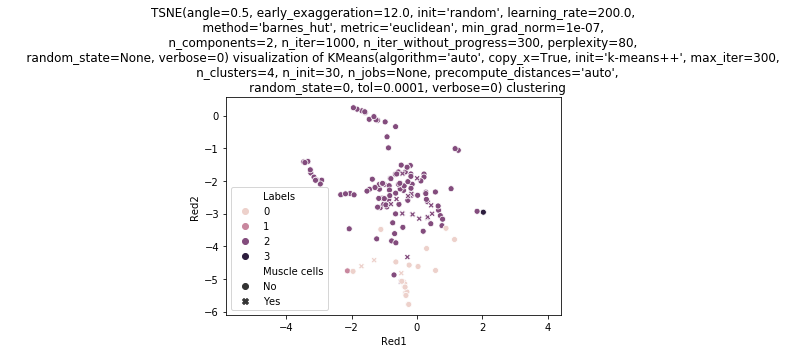

In [20]:
cluster_plotting(reduction_alg, clustering_alg)

In [26]:
print(f"""
Data shape: {data.shape}

df shape: {df.shape}
df columns: {df.columns}
""")


Data shape: (144, 14)

df shape: (144, 17)
df columns: Index(['Cell type', 'FOXC1', 'FOXC2', 'MEF2C', 'MEF2D', 'MEOX1', 'MEOX2',
       'MYF5', 'MYF6', 'MYH3', 'MYH7', 'MYOG', 'PAX3', 'PAX7', 'SIX1',
       'Muscle cells', 'Labels'],
      dtype='object')



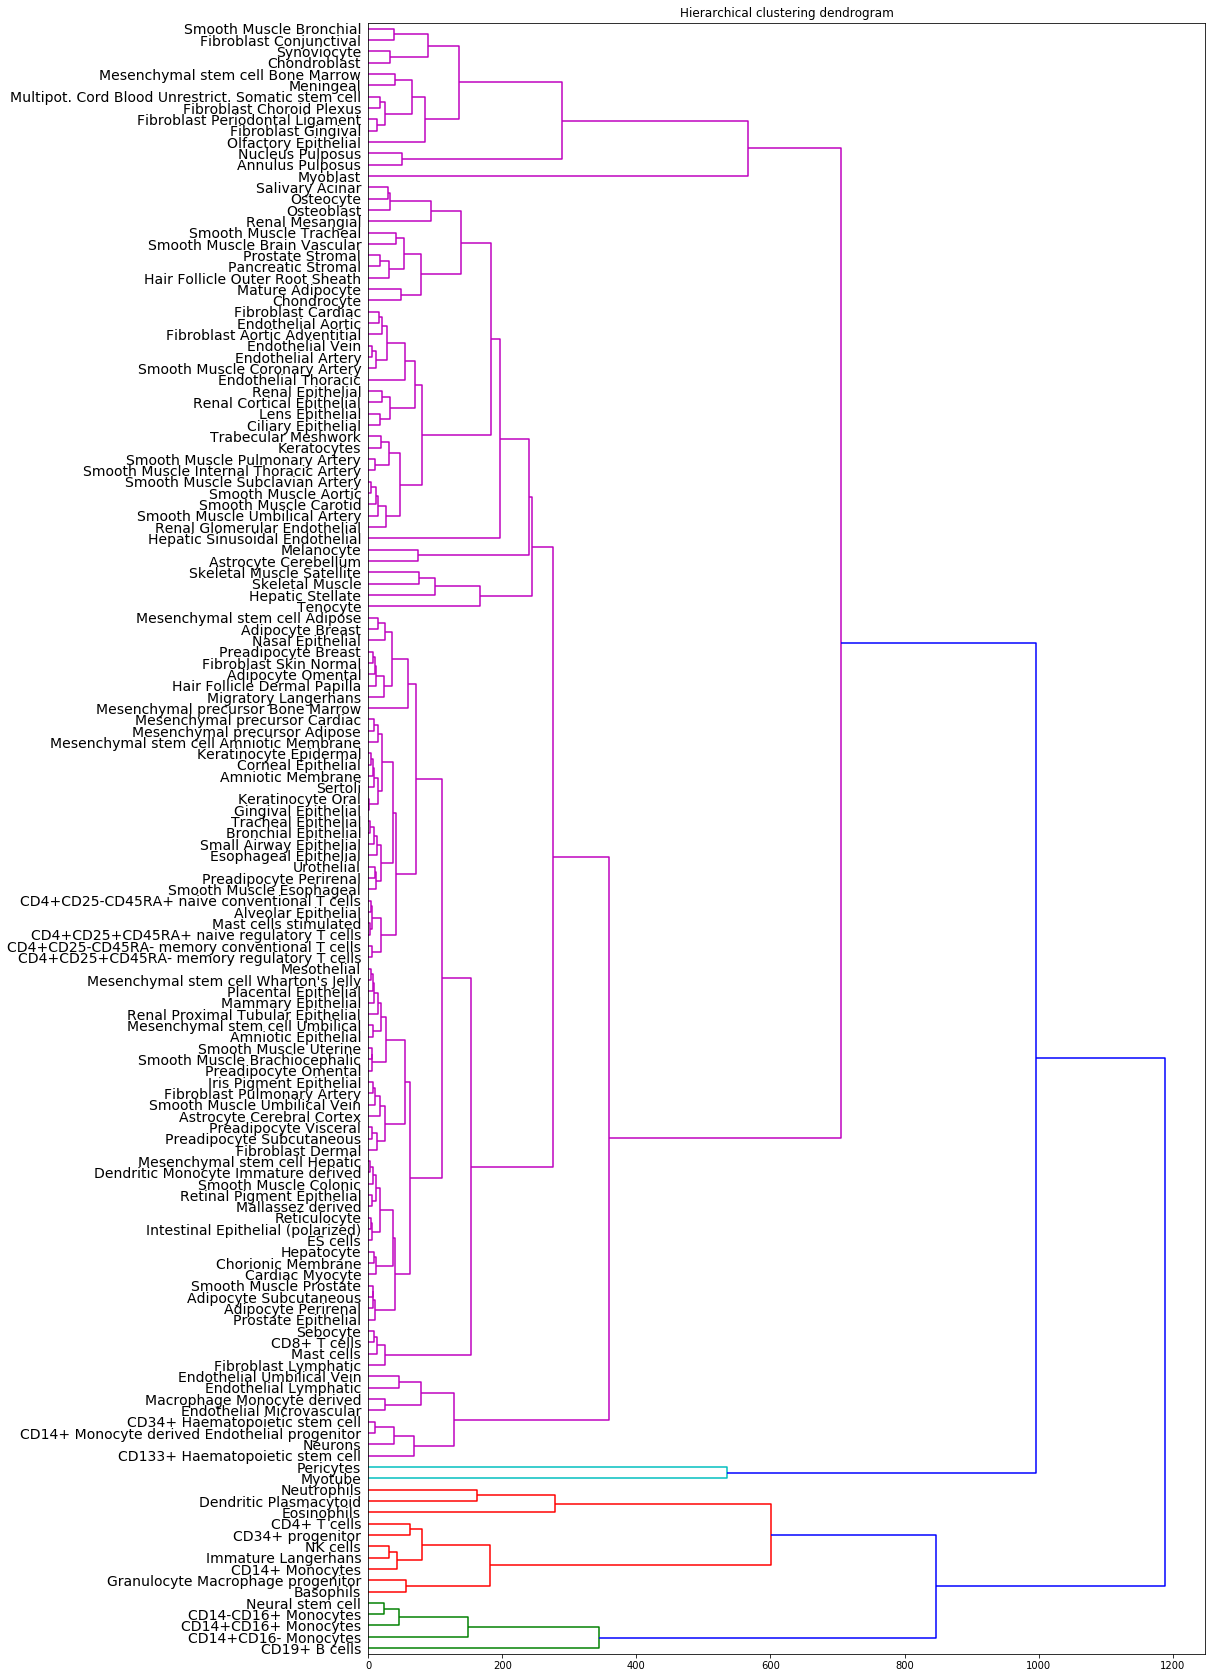

In [38]:
FIGWIDTH = 15
FIGHEIGHT = 30
YTICKSIZE = 14

cluster = AgglomerativeClustering(n_clusters = None, distance_threshold = 0)
model = cluster.fit(data)
df["Labels"] = model.labels_
len(model.labels_)

fig, ax = plt.subplots(figsize=(FIGWIDTH, FIGHEIGHT))

plt.title('Hierarchical clustering dendrogram')
plot_dendrogram(data, truncate_mode = "level", 
                leaf_label_func = lambda i: df['Cell type'][i],
                orientation = 'right',
                ax = ax)

ax.tick_params(axis='y', labelsize=YTICKSIZE)
# fig.savefig("Dendrogram.png")